jieba自定义分词

In [41]:
import jieba
jieba.load_userdict("jiebaDict.txt")
import jieba.posseg as pseg
# jieba.add_word('云计算')
jieba.add_word('石墨烯')
jieba.add_word('凱特琳')
jieba.del_word('自定义词')

test_sent = (
"李小福是创新办主任也是云计算方面的专家; 什么是八一双鹿\n"
"例如我输入一个带“韩玉赏鉴”的标题，在自定义词库中也增加了此词为N类\n"
"「台中」正確應該不會被切開。mac上可分出「石墨烯」；此時又可以分出來凱特琳了。"
)
words = jieba.cut(test_sent)
print('/'.join(words))

李小福/是/创新/办/主任/也/是/云计算/方面/的/专家/;/ /什么/是/八/一双/鹿/
/例如/我/输入/一个/带/“/韩玉/赏鉴/”/的/标题/，/在/自定义/词库/中/也/增加/了/此/词为/N/类/
/「/台/中/」/正確/應該/不會/被/切開/。/mac/上/可/分出/「/石墨烯/」/；/此時/又/可以/分出/來/凱特琳/了/。


#### chinese text statistical analysis

In [16]:
ch_pos_df=ch_statistics.part_of_speech_dataframe('zh-cn',ch_word_list)
ch_pos_df

,part of speech,count
0,x,130
1,numeral,32
2,eng,14
3,n,158
4,v,101
5,l,11
6,prep,21
7,uj,29
8,方位词,5
9,time,8


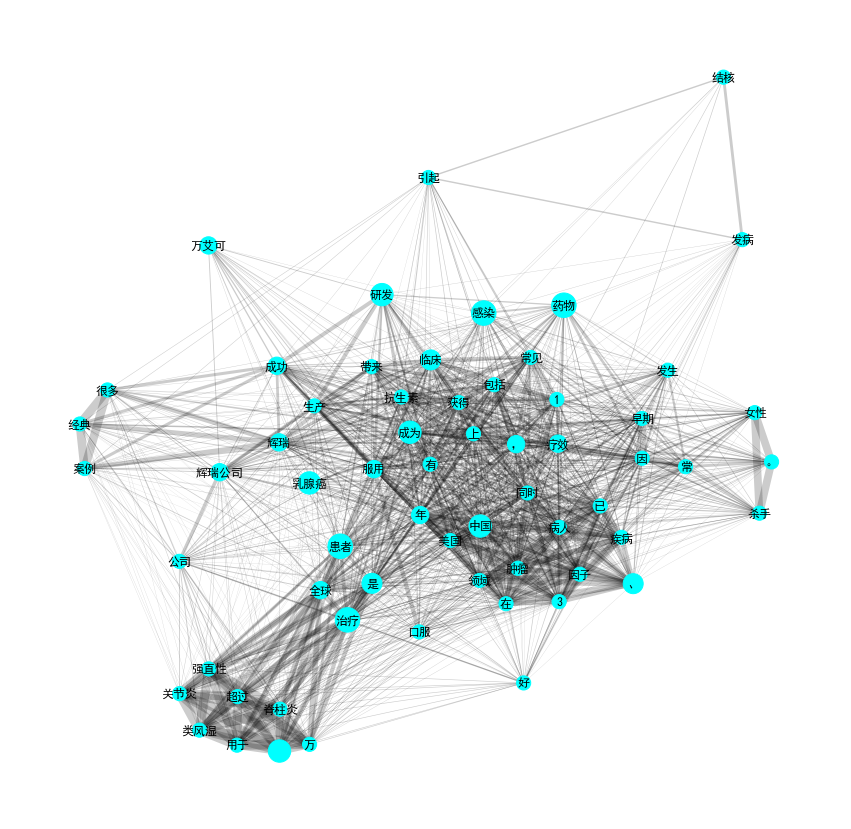

In [23]:
ch_statistics.create_word_network(ch_WordList_in_SentenceList,cnt=1)


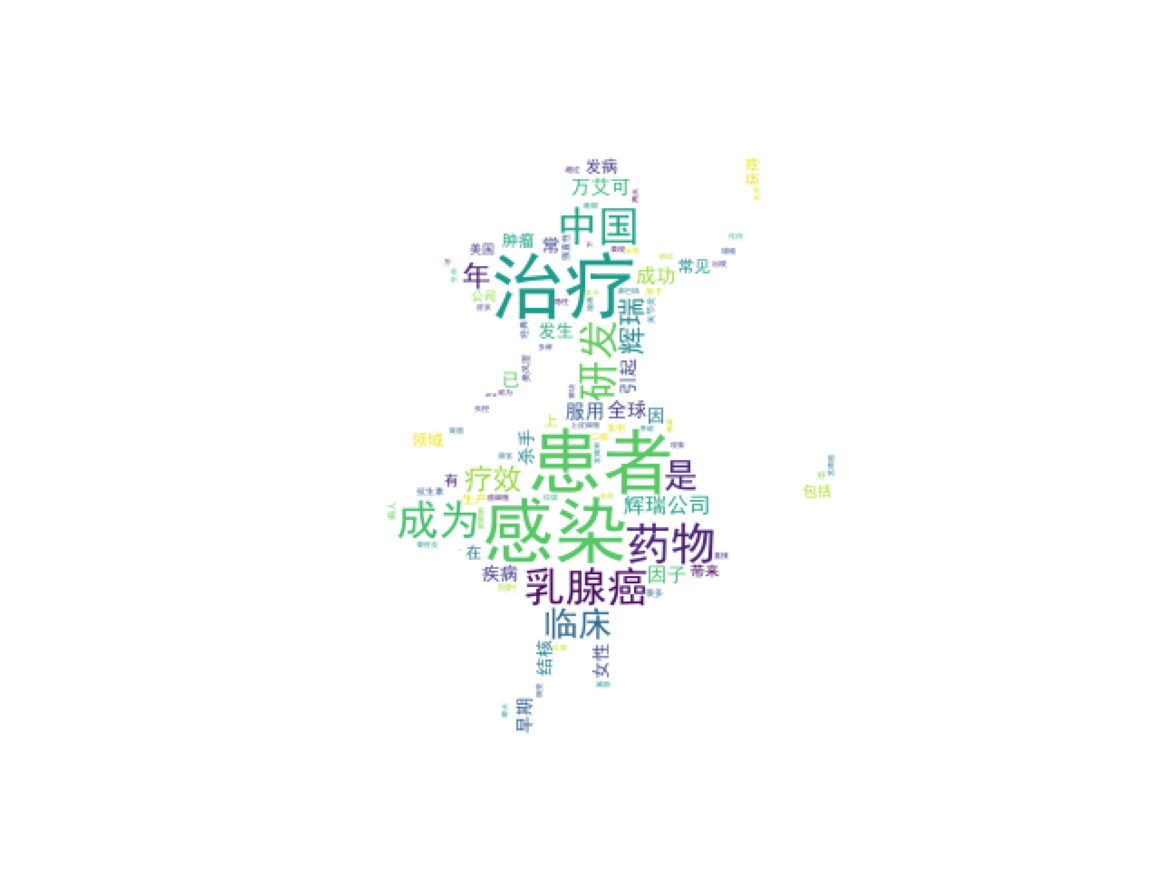

In [24]:
ch_statistics.word_cloud(ch_word_list)

In [25]:
from text_mining_model import lda_model
lda_model(ch_word_list)

0:
  "治疗" (0.018)
  "药物" ( 0.018)
  " " ( 0.015)
  "成为" ( 0.015)
  "中国" ( 0.015)
  "研发" ( 0.015)
  "辉瑞公司" ( 0.010)
  "成功" ( 0.010)
  "，" ( 0.010)
  "获得"( 0.007)
1:
  "感染" (0.018)
  "患者" ( 0.018)
  "乳腺癌" ( 0.015)
  "是" ( 0.012)
  "临床" ( 0.012)
  "、" ( 0.012)
  "辉瑞" ( 0.010)
  "服用" ( 0.010)
  "万艾可" ( 0.010)
  "全球"( 0.010)

Perplexity:  -6.520992215556813
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [26]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import codecs
import pyLDAvis.gensim_models

def lda_model(fenci_con):
    train = []
    for w in fenci_con:
        train.append([w])
    dictionary = corpora.Dictionary(train)
    corpus = [dictionary.doc2bow(text) for text in train]
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=60)
    # num_topics：主题数目
    # passes：训练伦次
    # num_words：每个主题下输出的term的数目

    for topic in lda.print_topics(num_words = 10):
        termNumber = topic[0]
        print(topic[0], ':', sep='')
        listOfTerms = topic[1].split('+')
        for term in listOfTerms:
            listItems = term.split('*')
            print('  ', listItems[1], '(', listItems[0], ')', sep='')

    print('\nPerplexity: ', lda.log_perplexity(corpus))#The LDA model (lda_model) we have created above can be used to compute the model’s perplexity, i.e. how good the model is. The lower the score the better the model will be.
    d=pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)   
    pyLDAvis.save_html(d, 'lda_result.html')

In [27]:
lda_model(ch_word_list)

0:
  "患者" (0.025)
  "中国" ( 0.021)
  "成为" ( 0.021)
  "乳腺癌" ( 0.021)
  "、" ( 0.017)
  "服用" ( 0.013)
  "发生" ( 0.009)
  "因" ( 0.009)
  "案例" ( 0.009)
  "1"( 0.009)
1:
  "治疗" (0.027)
  "药物" ( 0.027)
  "感染" ( 0.027)
  "临床" ( 0.018)
  "辉瑞" ( 0.014)
  "年" ( 0.014)
  "很多" ( 0.010)
  "超过" ( 0.010)
  "类风湿" ( 0.010)
  "同时"( 0.010)
2:
  " " (0.022)
  "研发" ( 0.022)
  "是" ( 0.018)
  "成功" ( 0.014)
  "，" ( 0.014)
  "万艾可" ( 0.014)
  "疗效" ( 0.014)
  "全球" ( 0.014)
  "辉瑞公司" ( 0.014)
  "口服"( 0.010)

Perplexity:  -6.855383810814527
